In [1]:
import pandas as pd
import numpy as np
import sys
import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from core.lca_calculation_functions import search_activity, get_inventory_dataset, run_lca, compute_midpoint_contributions

In [4]:
# Brightway imports
import bw2analyzer as ba
import bw2calc as bc
import bw2data as bd
import bw2io as bi
import brightway2 as bw

# Set up BW and LCIs

In [5]:
BW_PROJECT = 'metallican' # insert your project name here
bd.projects.set_current(BW_PROJECT)
bd.databases

Databases dictionary with 12 object(s):
	Copper
	Gold
	Iron
	Nickel
	Regioinvent
	Silver
	Zinc
	biosphere3
	biosphere3_spatialized_flows
	ecoinvent-3.10-cutoff
	ecoinvent-3.10-cutoff regionalized
	metallican_lci

In [6]:
EI_DB = 'ecoinvent-3.10-cutoff'
RI_DB = 'Regioinvent'

In [7]:
iw_methods = [method for method in bd.methods if "impact world+" in " ".join(method).lower()]
iw_methods

[('IMPACT World+ v2.0.1, footprint version',
  'climate change',
  'carbon footprint'),
 ('IMPACT World+ v2.0.1, footprint version',
  'ecosystem quality',
  'remaining ecosystem quality damage'),
 ('IMPACT World+ v2.0.1, footprint version',
  'energy resources: non-renewable',
  'fossil and nuclear energy use'),
 ('IMPACT World+ v2.0.1, footprint version',
  'human health',
  'remaining human health damage'),
 ('IMPACT World+ v2.0.1, footprint version',
  'water use',
  'water scarcity footprint'),
 ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10',
  'Ecosystem quality',
  'Climate change, ecosystem quality, long term'),
 ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10',
  'Ecosystem quality',
  'Climate change, ecosystem quality, short term'),
 ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10',
  'Human health',
  'Climate change, human health, long term'),
 ('IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10',
  'Human health',
  'Climate c

In [8]:
from core.constants import IMPACT_METHODS_EP, IMPACT_METHODS_MP_EQ, IMPACT_METHODS_MP_HH

In [9]:
INVENTORIES_CA = {
    "Copper concentrate": ("gold-silver mine operation and beneficiation", "copper concentrate, sulfide ore", 'CA-QC'),
    "Gold-silver ingot": ("gold-silver mine operation and beneficiation", "gold-silver, ingot", "CA-QC"),
    "Lead concentrate": ("gold-silver mine operation and beneficiation", "lead concentrate", "CA-QC"),
    "Zinc concentrate": ("gold-silver mine operation and beneficiation", "zinc concentrate", "CA-QC"),
    "Gold refined": ("gold-silver mine operation with refinery", "gold", "CA-QC"),
    "Silver refined": ("gold-silver mine operation with refinery", "silver", "CA-QC"),
    "Iron concentrate": ("iron ore mine operation and beneficiation", "iron ore concentrate", "CA-QC"),
    "Nickel concentrate": ("nickel mine operation and benefication to nickel concentrate, 16% Ni", "nickel concentrate, 16% Ni", "CA-QC"),
}

In [10]:
INVENTORIES_CA_reg = {
    "Copper concentrate": ("gold-silver mine operation and beneficiation", "copper concentrate, sulfide ore", 'CA'),
    "Gold-silver ingot": ("gold-silver mine operation and beneficiation", "gold-silver, ingot", "CA"),
    "Lead concentrate": ("gold-silver mine operation and beneficiation", "lead concentrate", "CA"),
    "Zinc concentrate": ("gold-silver mine operation and beneficiation", "zinc concentrate", "CA"),
    "Gold refined": ("gold-silver mine operation with refinery", "gold", "CA"),
    "Silver refined": ("gold-silver mine operation with refinery", "silver", "CA"),
    "Iron concentrate": ("iron ore mine operation and beneficiation", "iron ore concentrate", "CA"),
    "Nickel concentrate": ("nickel mine operation and benefication to nickel concentrate, 16% Ni", "nickel concentrate, 16% Ni", "CA"),
}

In [11]:
INVENTORIES_CA_EI_ds = get_inventory_dataset(INVENTORIES_CA, database_names=[EI_DB])

In [12]:
INVENTORIES_CA_RI_ds = get_inventory_dataset(INVENTORIES_CA_reg, database_names=[RI_DB])

# Run simple LCAs and compare EI vs RI

In [13]:
df_ei_eq = run_lca(INVENTORIES_CA_EI_ds, amount=1, lcia_methods=IMPACT_METHODS_MP_EQ)
df_ei_hh = run_lca(INVENTORIES_CA_EI_ds, amount=1, lcia_methods=IMPACT_METHODS_MP_HH)
df_ri_eq = run_lca(INVENTORIES_CA_RI_ds, amount=1, lcia_methods=IMPACT_METHODS_MP_EQ)
df_ri_hh = run_lca(INVENTORIES_CA_RI_ds, amount=1, lcia_methods=IMPACT_METHODS_MP_HH)

In [14]:
df_ei_hh.to_csv(r'results/MP_results/ei_hh_mp.csv', index=False)
df_ei_eq.to_csv(r'results/MP_results/ei_eq_mp.csv', index=False)
df_ri_hh.to_csv(r'results/MP_results/ri_hh_mp.csv', index=False)
df_ri_eq.to_csv(r'results/MP_results/ri_eq_mp.csv', index=False)

In [15]:
from core.visualisation_functions import plot_relative_difference_heatmap

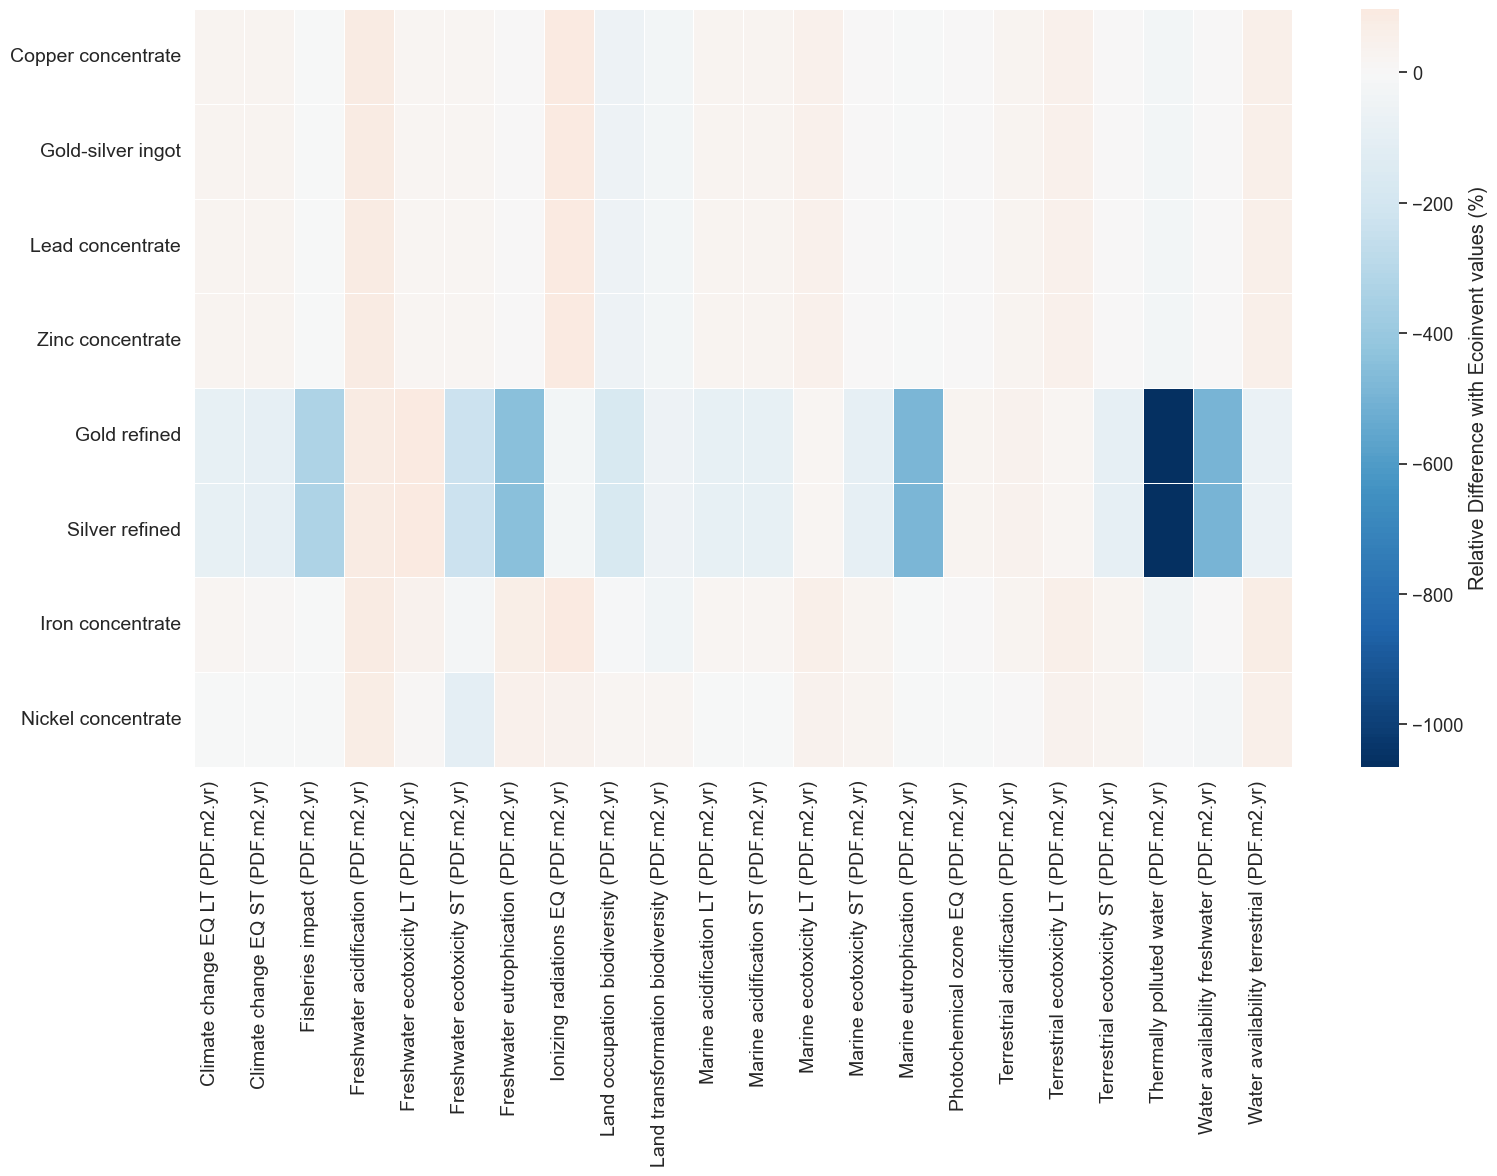

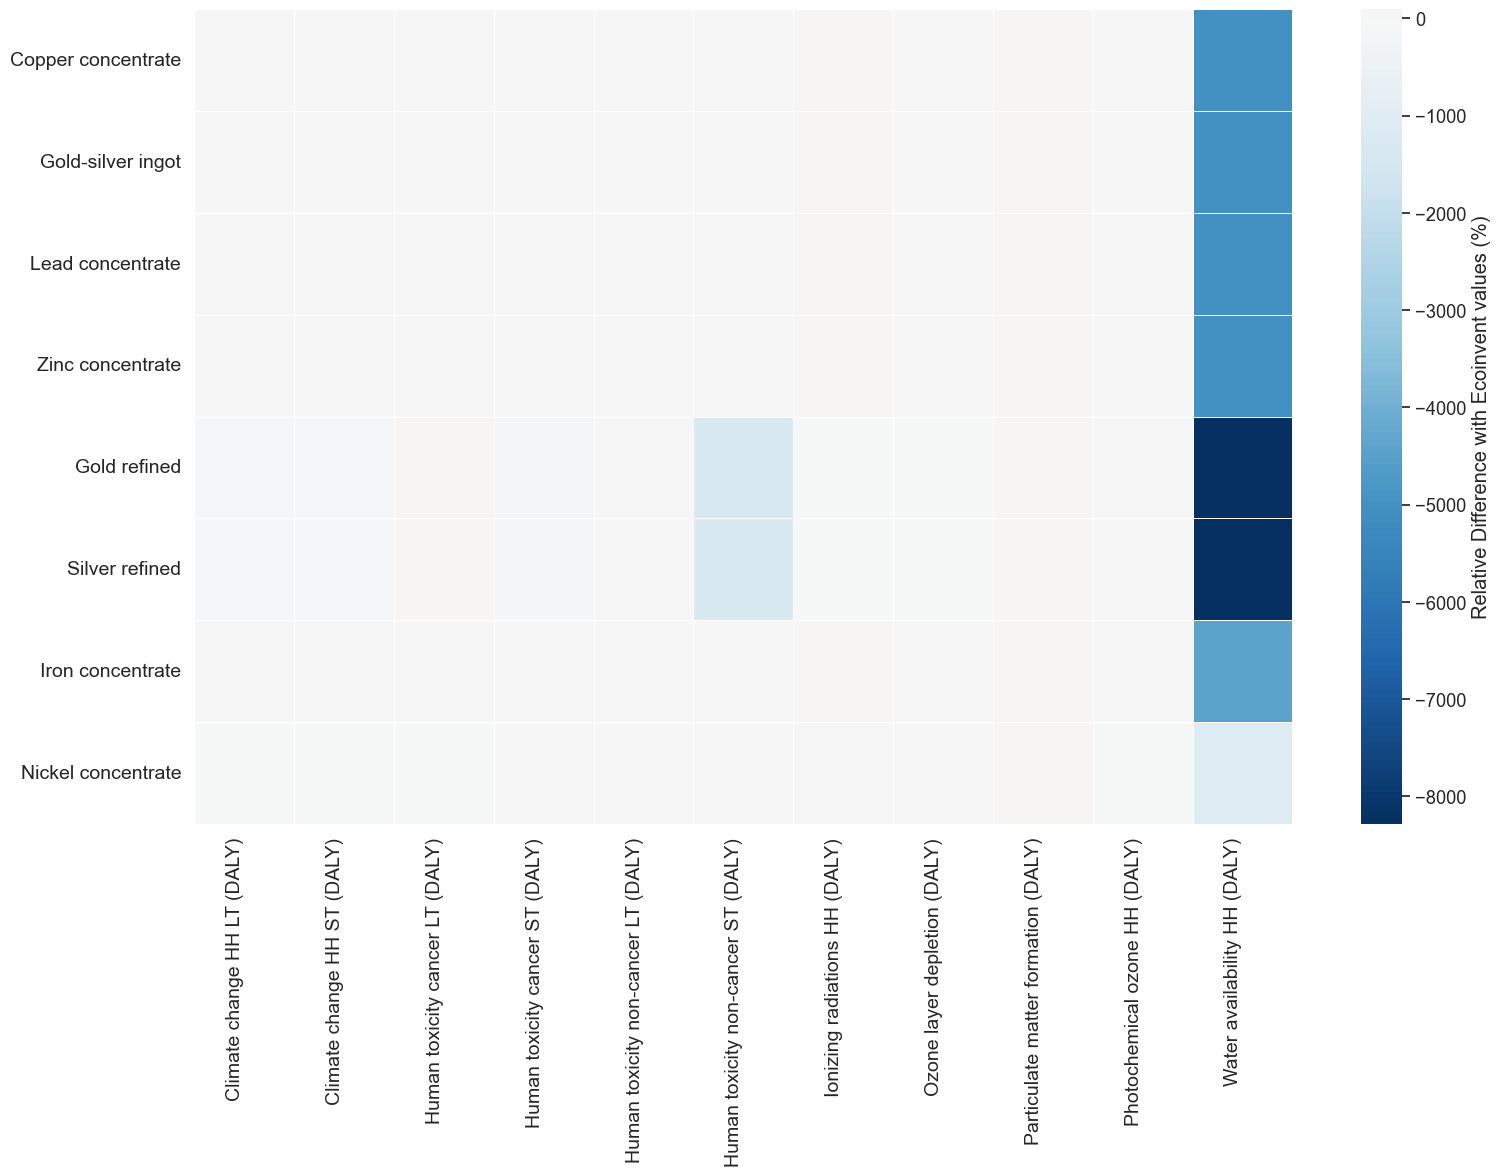

In [16]:
plot_relative_difference_heatmap(df_ei_eq, df_ri_eq, title='', output_png='results/MP_results/heatmap_eq.png')
plot_relative_difference_heatmap(df_ei_hh, df_ri_hh, title='', output_png='results/MP_results/heatmap_hh.png')

# MP contributions to EP

In [28]:
damage_method_version="IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10"
all_damage = [m for m in bw.methods if m[0] == damage_method_version]

In [29]:
df_ei_hh_contrib, df_ei_eq_contrib = compute_midpoint_contributions(INVENTORIES_CA_EI_ds, amount=1)
df_ri_hh_contrib, df_ri_eq_contrib = compute_midpoint_contributions(INVENTORIES_CA_RI_ds, amount=1)

In [30]:
df_ei_hh_contrib.to_csv(r'results/MP_contributions/ei_hh_mp.csv', index=False)
df_ei_eq_contrib.to_csv(r'results/MP_contributions/ei_eq_mp.csv', index=False)
df_ri_hh_contrib.to_csv(r'results/MP_contributions/ri_hh_mp.csv', index=False)
df_ri_eq_contrib.to_csv(r'results/MP_contributions/ri_eq_mp.csv', index=False)

In [31]:
from core.visualisation_functions import plot_midpoint_contributions

Plot saved to results/MP_contributions/ei_hh.png
Plot saved to results/MP_contributions/ei_eq.png
Plot saved to results/MP_contributions/ri_hh.png
Plot saved to results/MP_contributions/ri_eq.png


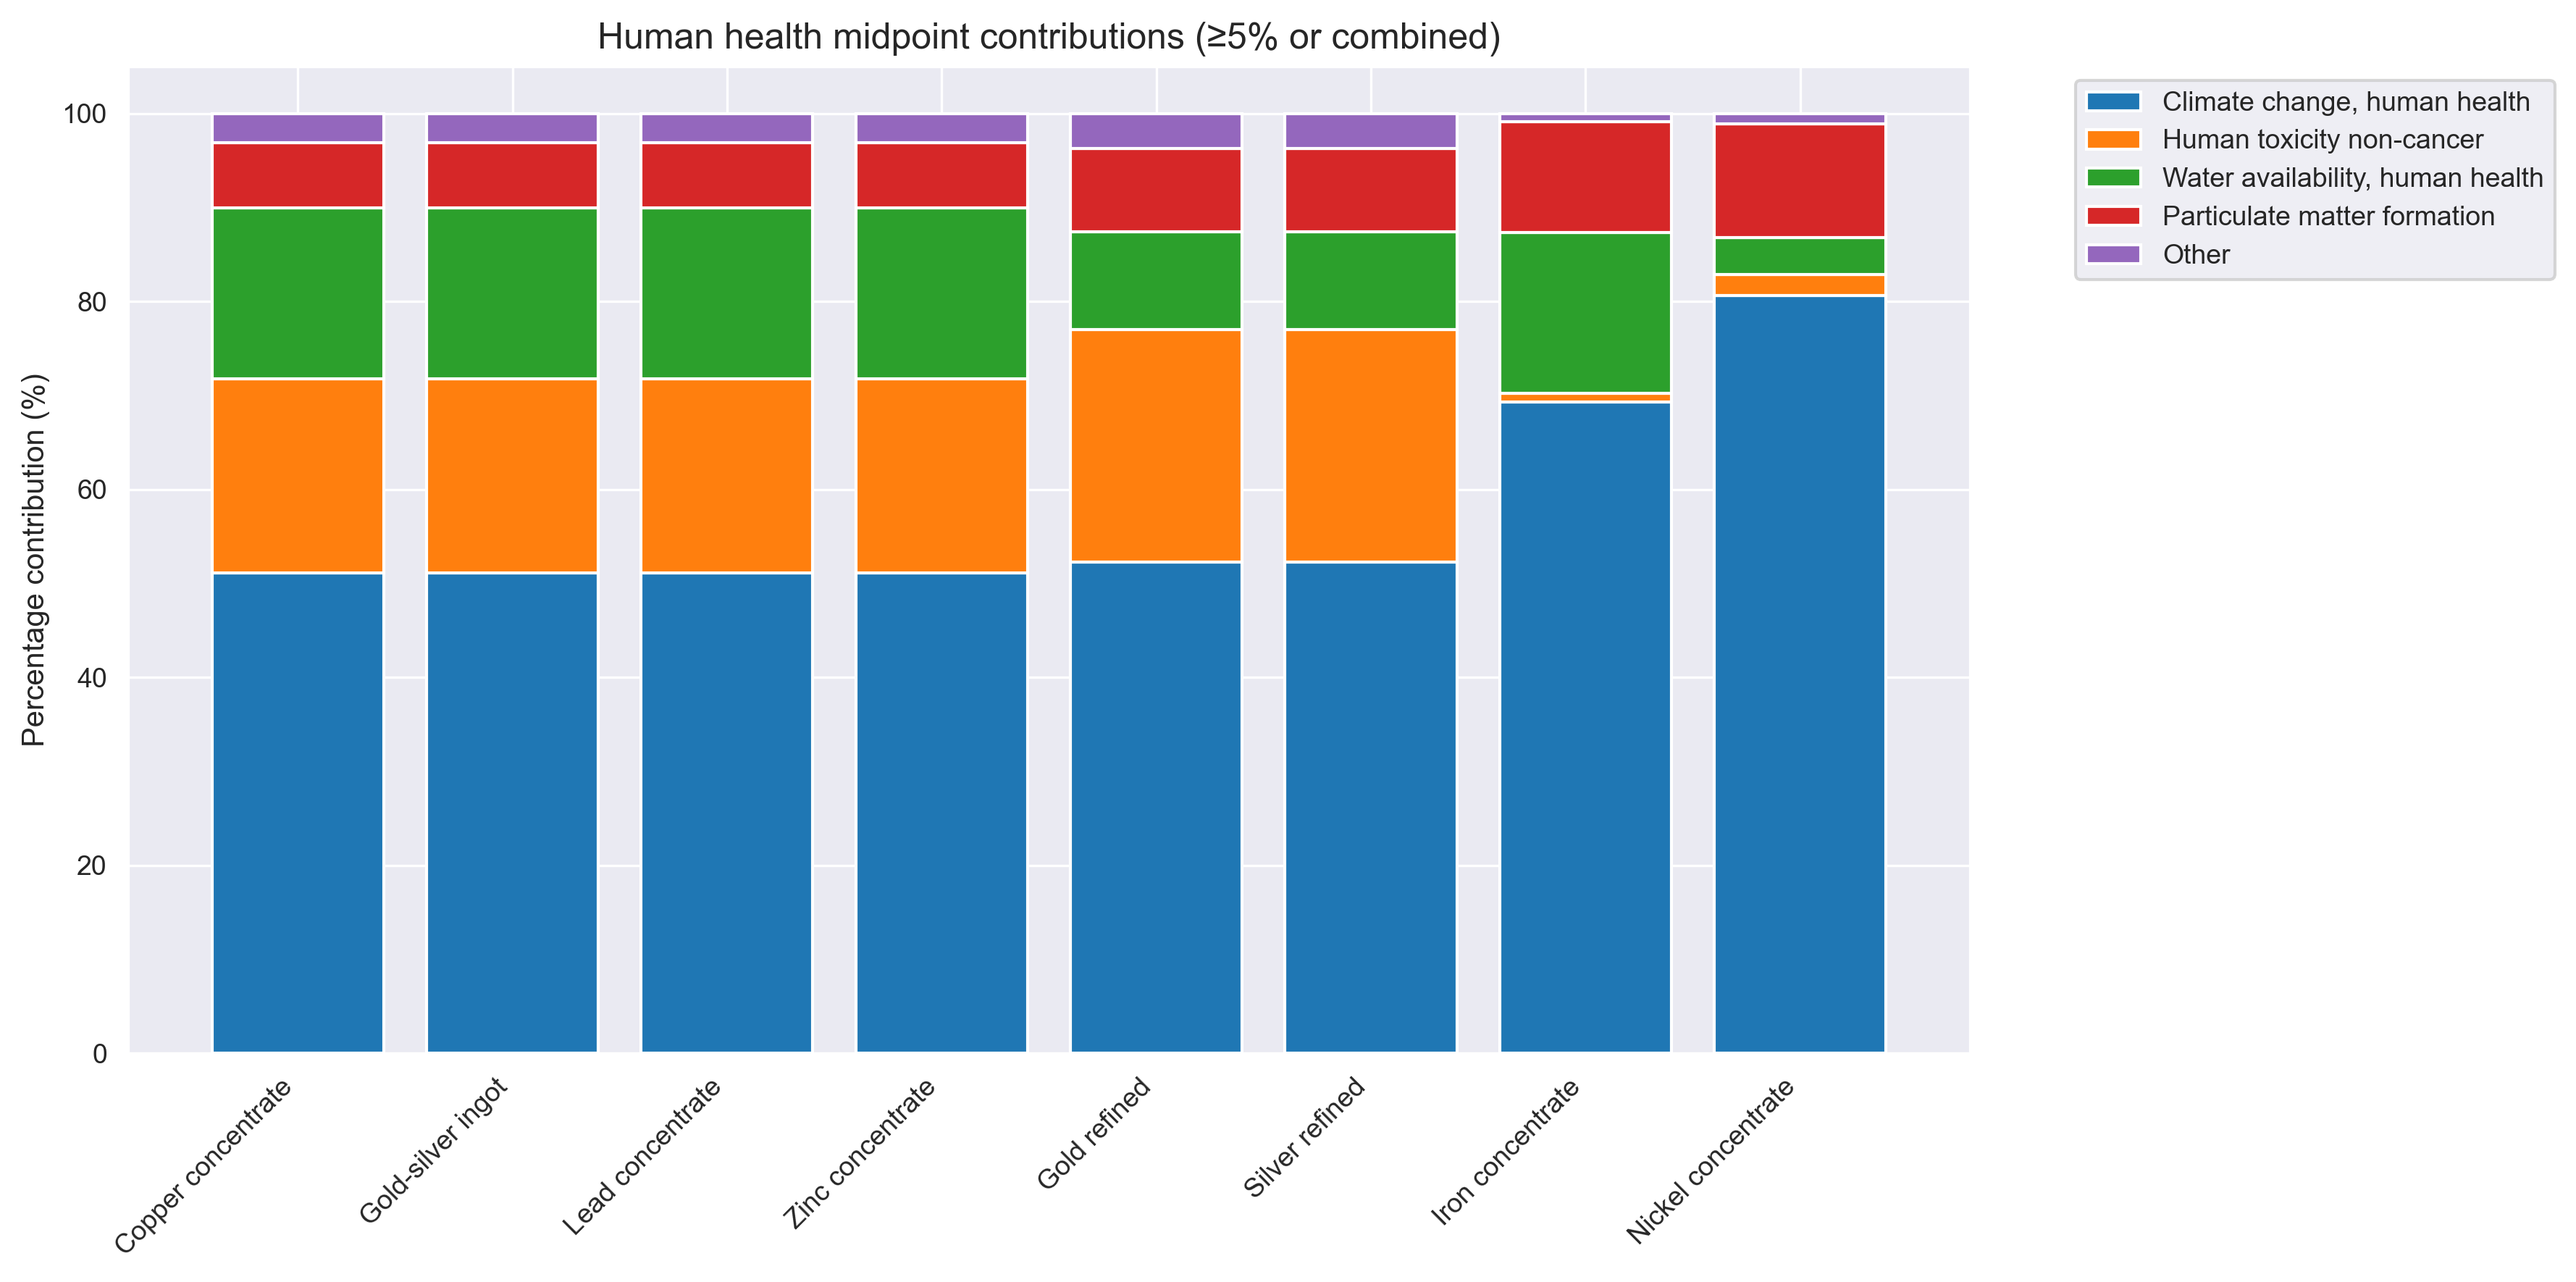

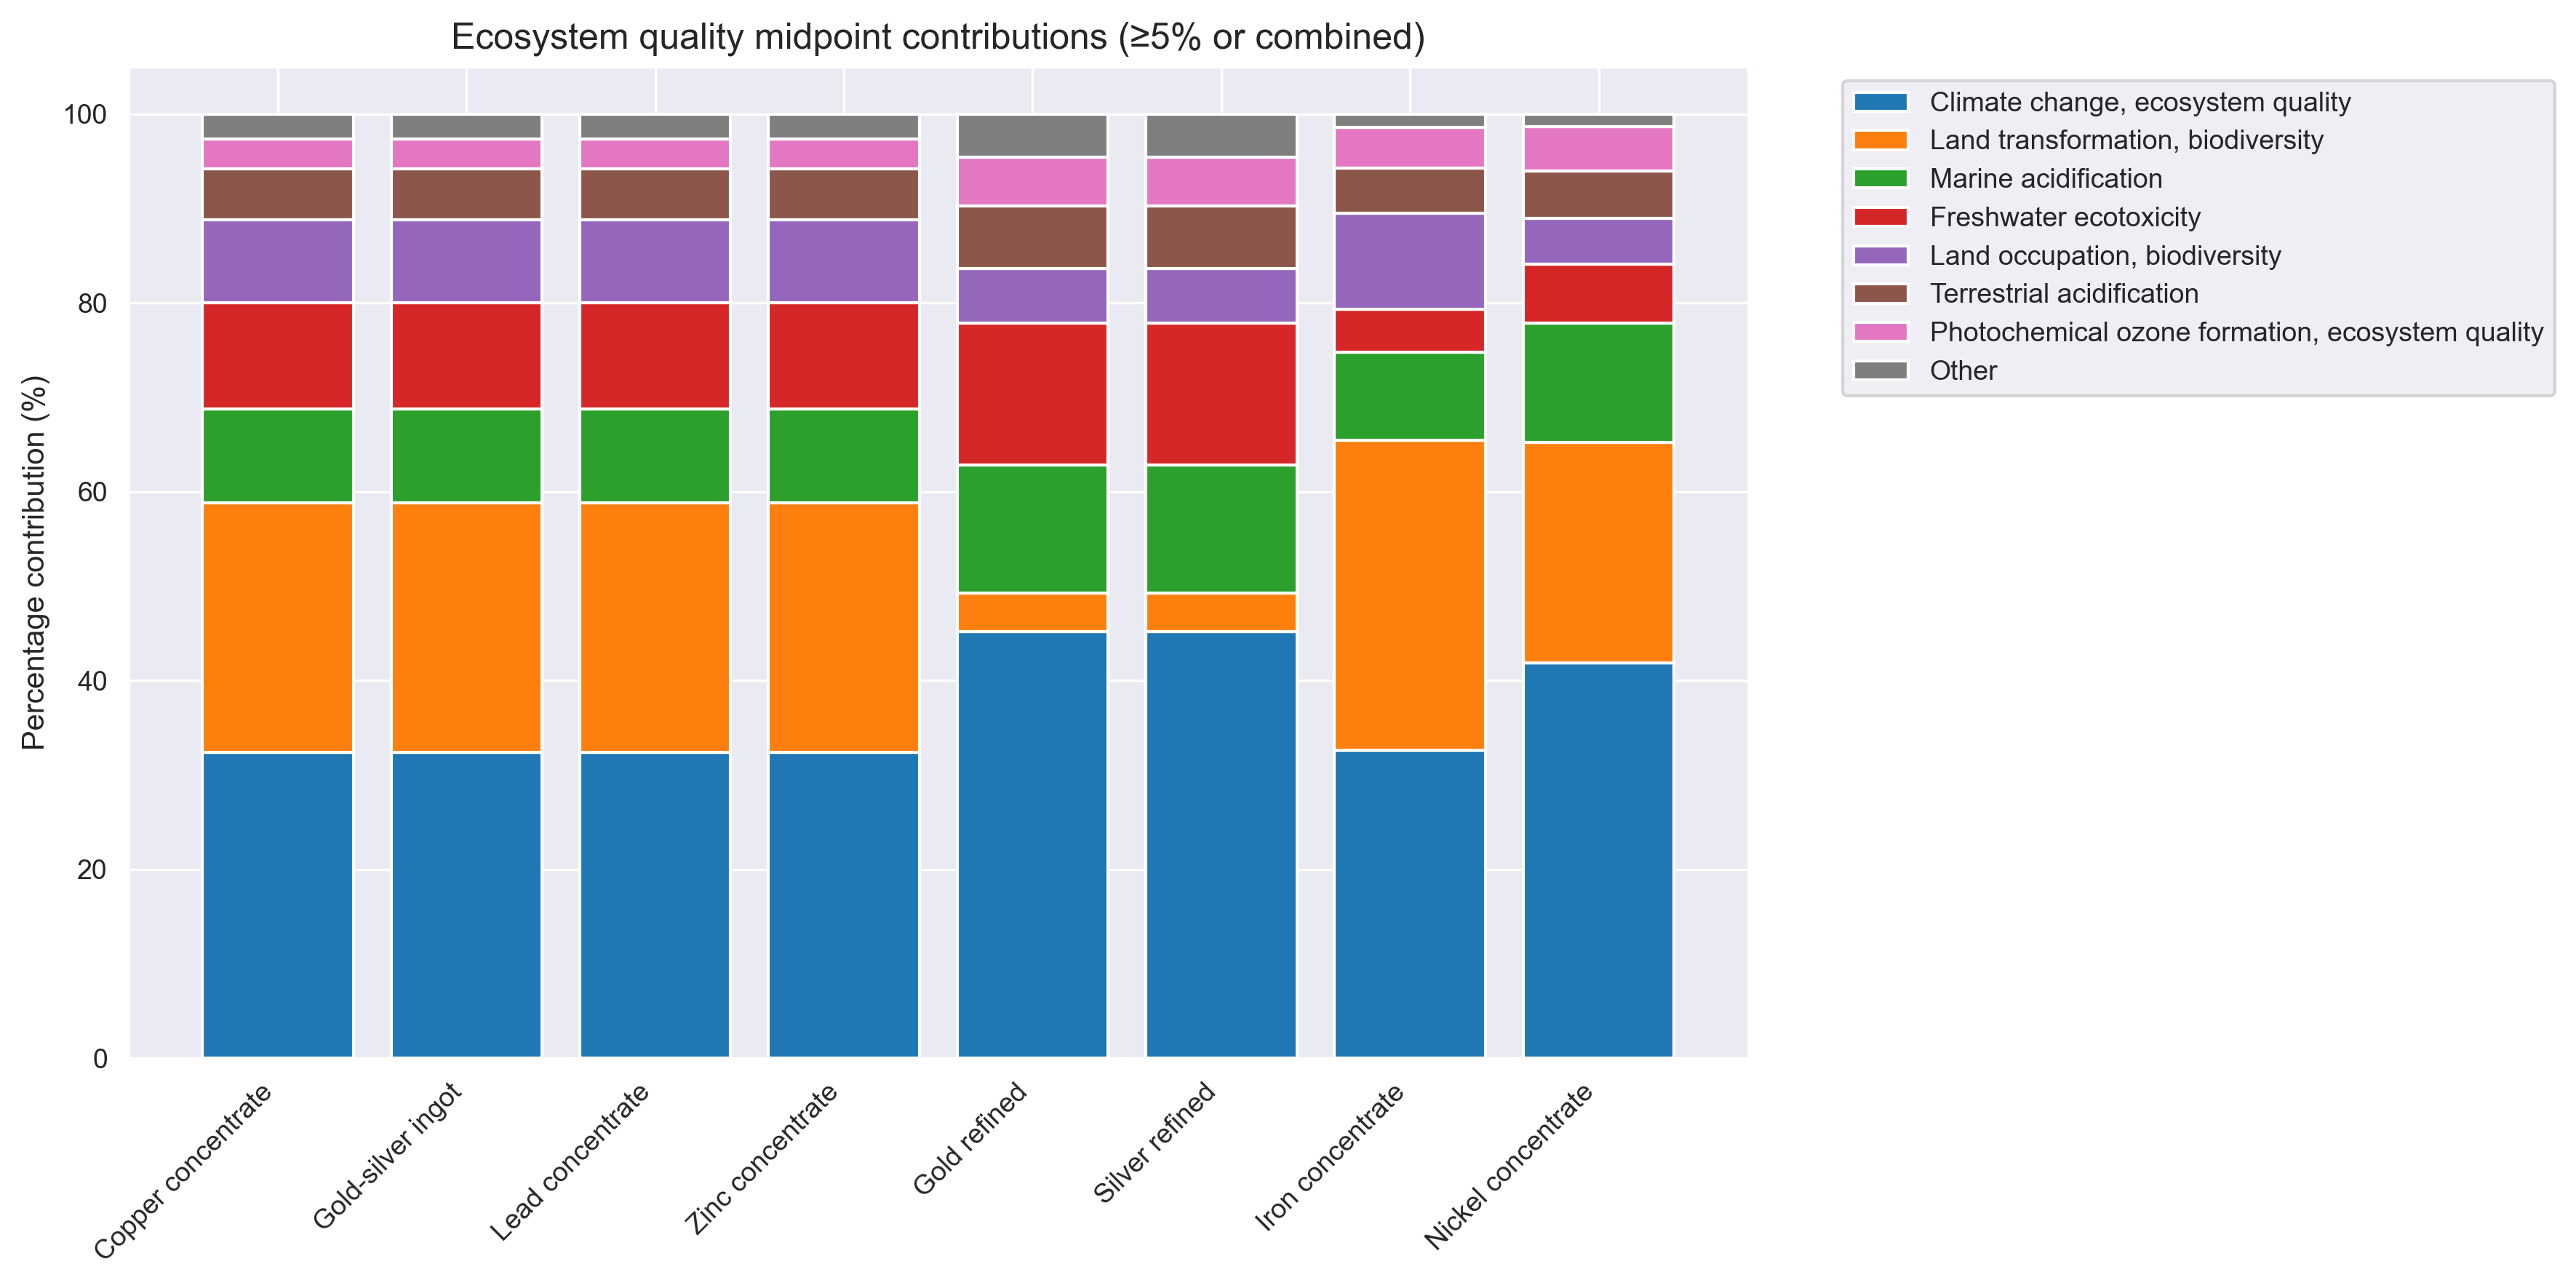

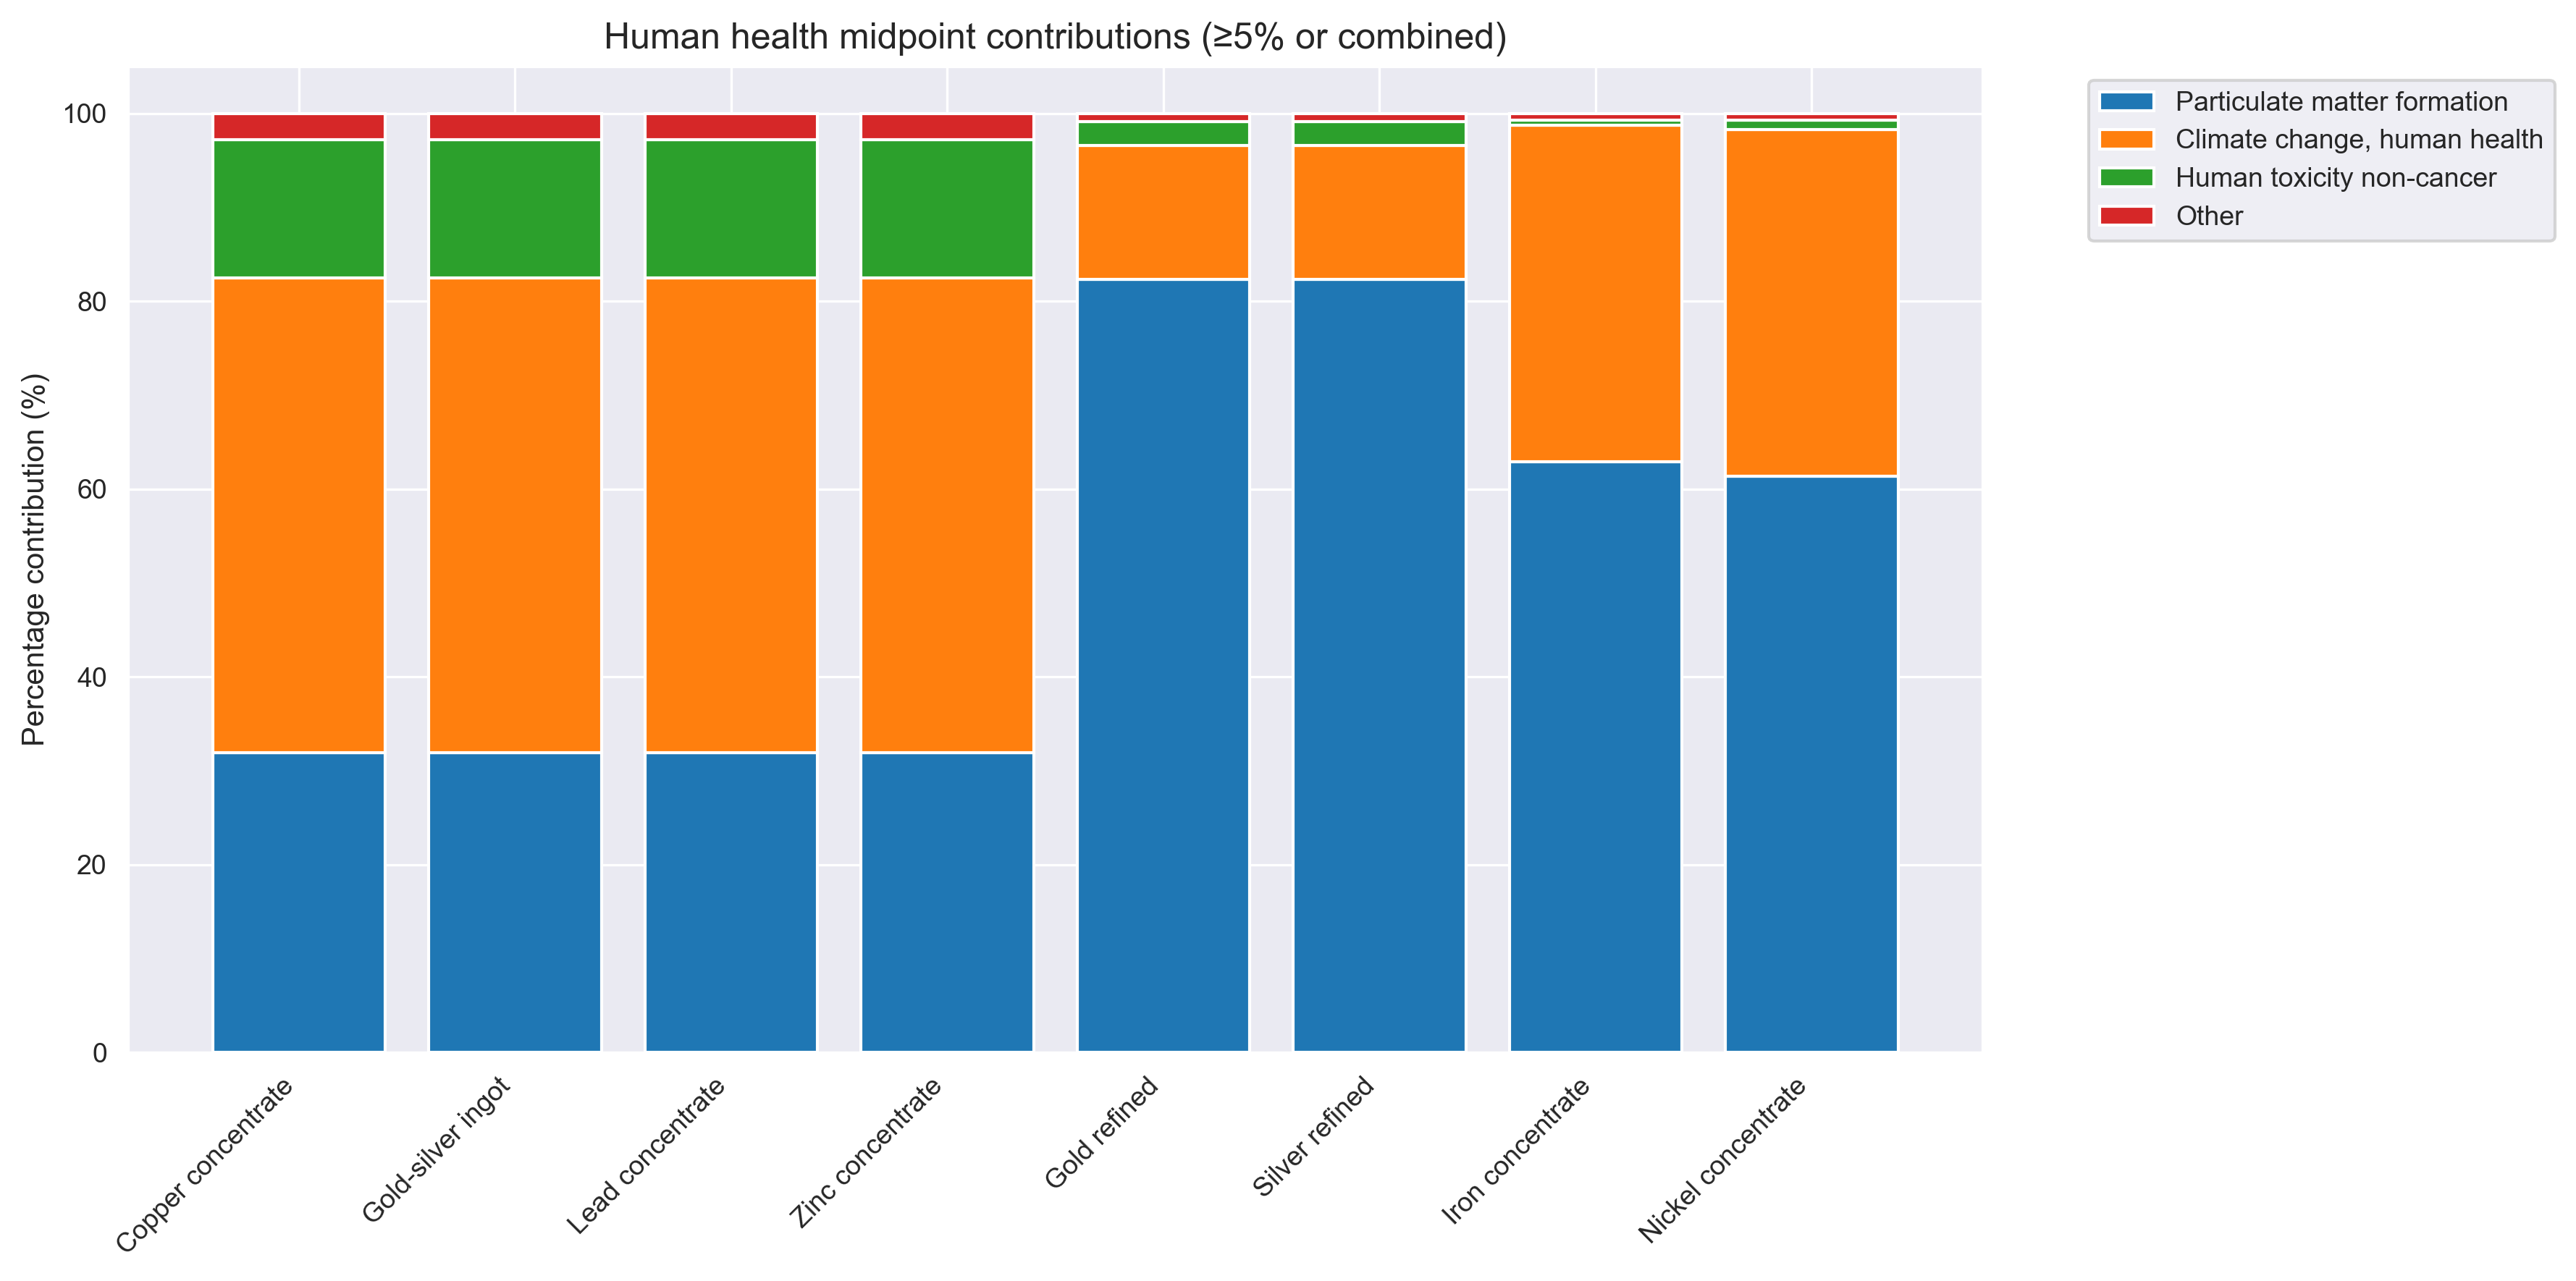

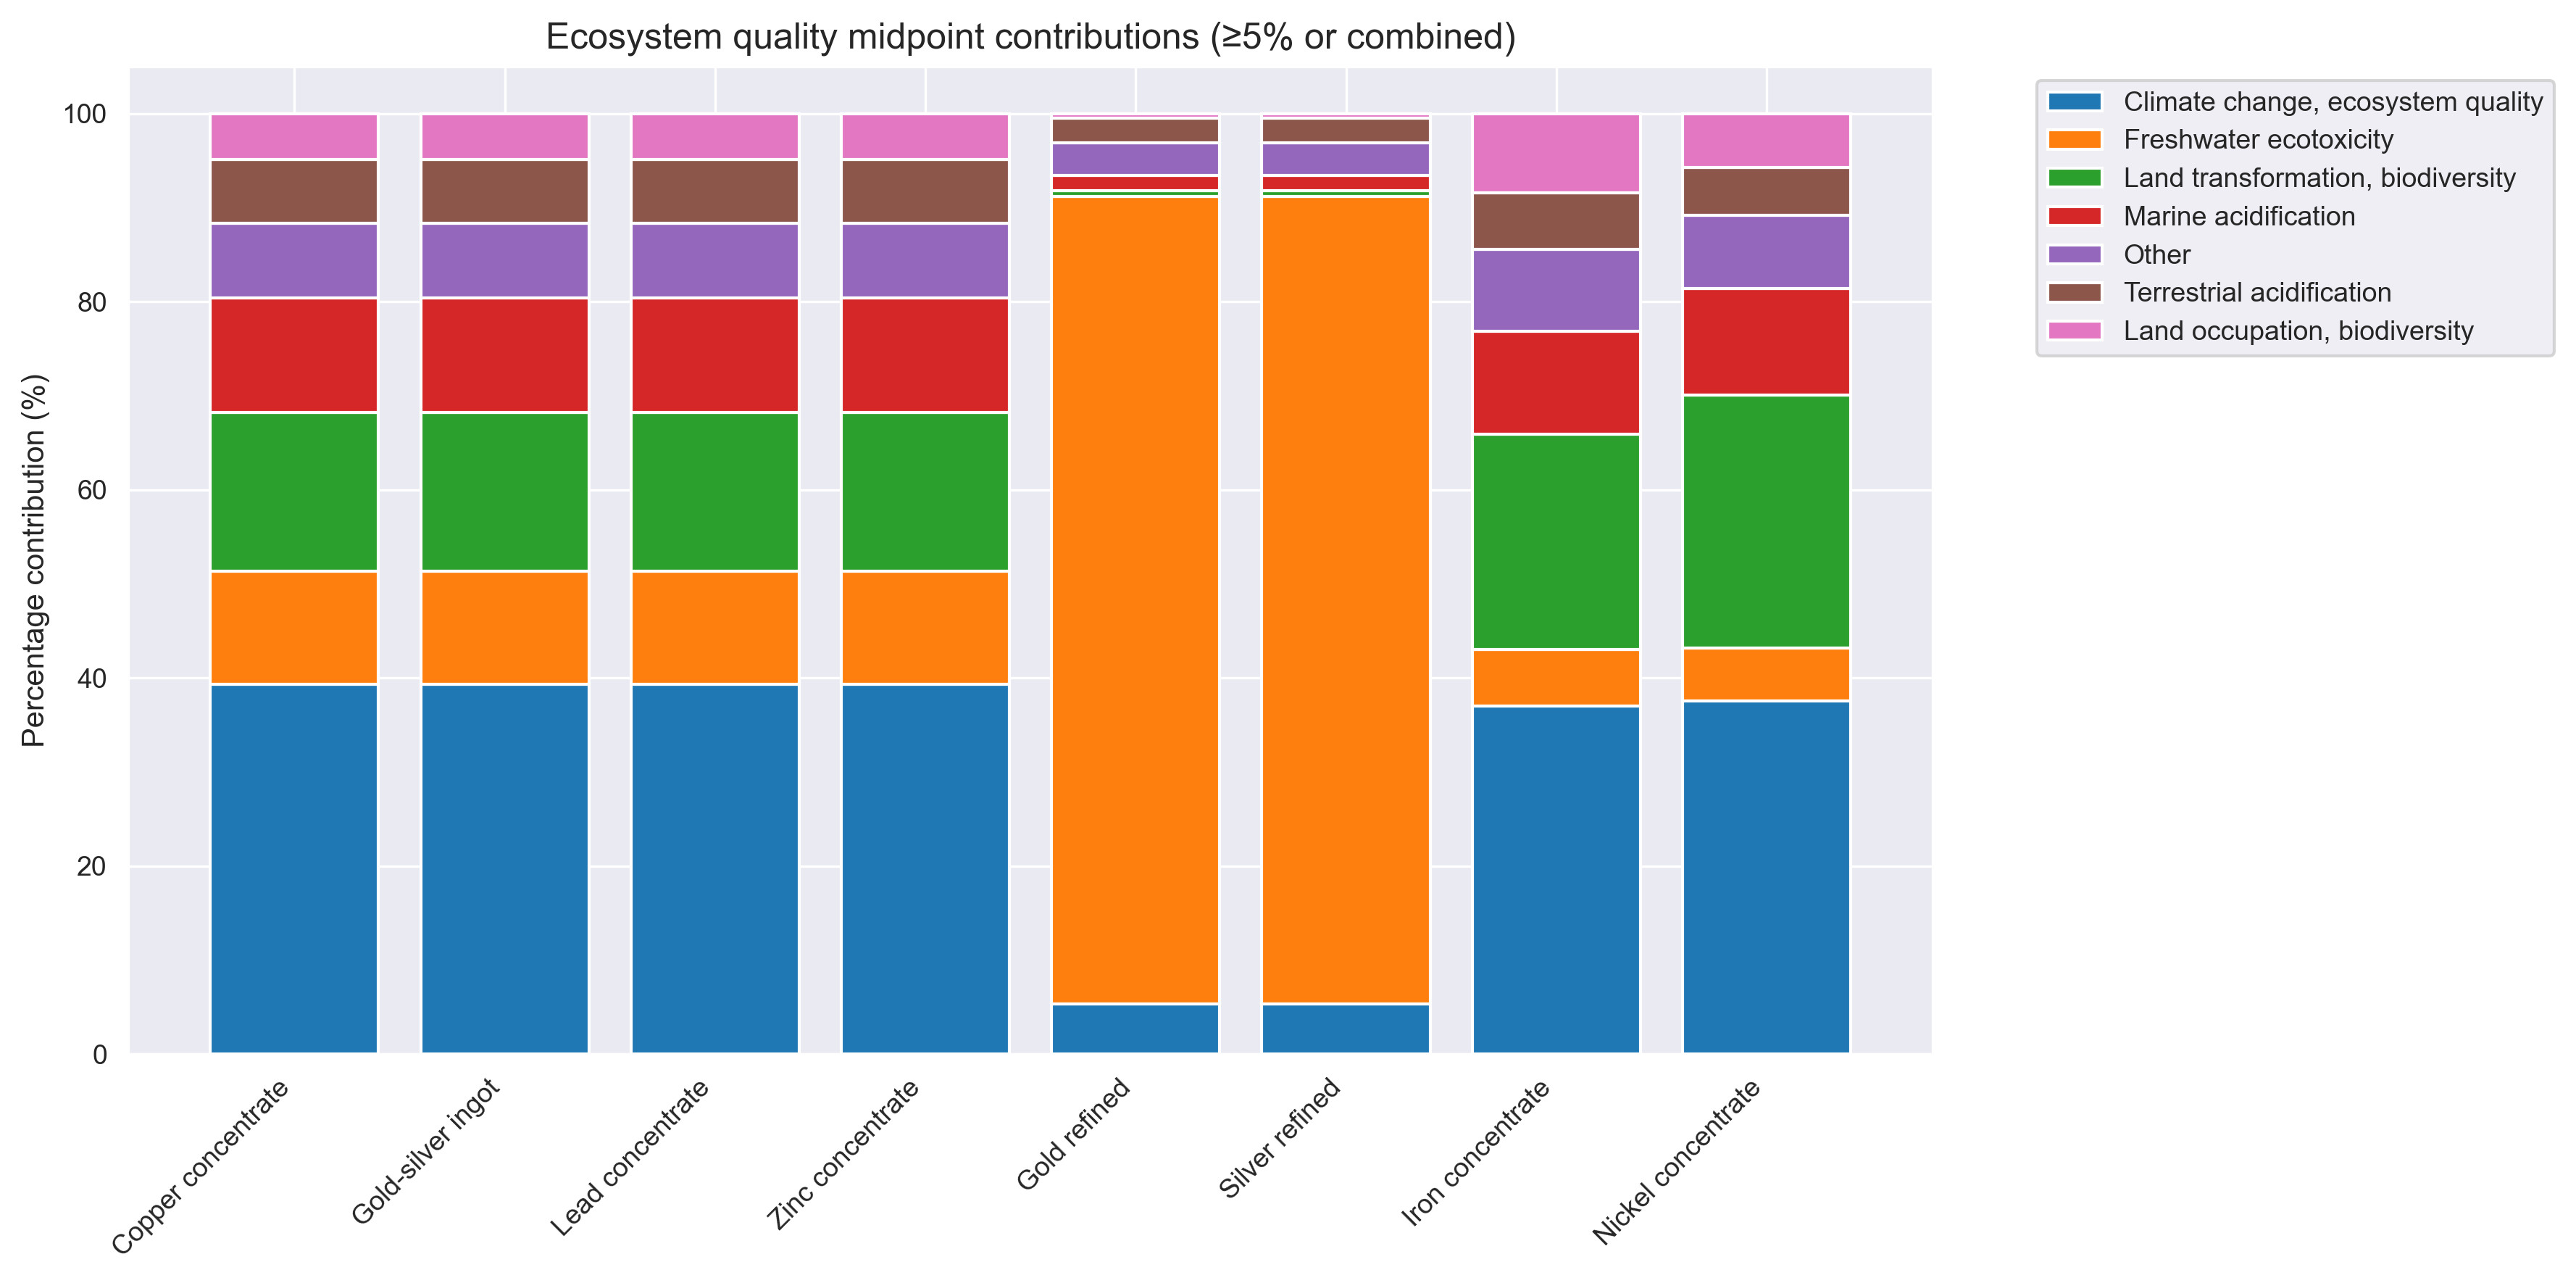

In [32]:
plot_midpoint_contributions(df_ei_hh_contrib, 'Human health', save_path='results/MP_contributions/ei_hh.png')
plot_midpoint_contributions(df_ei_eq_contrib, 'Ecosystem quality', save_path='results/MP_contributions/ei_eq.png')
plot_midpoint_contributions(df_ri_hh_contrib, 'Human health', save_path='results/MP_contributions/ri_hh.png')
plot_midpoint_contributions(df_ri_eq_contrib, 'Ecosystem quality', save_path='results/MP_contributions/ri_eq.png')

# Contribution analysis

In [17]:
from core.lca_calculation_functions import first_tier_contributions, process_contributions, first_tier_contributions_batch

In [13]:
hh_endpoint = ("IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10", "Human health", "Total human health")
eq_endpoint = ("IMPACT World+ Damage 2.1_regionalized for ecoinvent v3.10", "Ecosystem quality", "Total ecosystem quality")

In [15]:
ca_ri_hh = first_tier_contributions_batch(INVENTORIES_CA_RI_ds, method_id=hh_endpoint)

🔹 Processing Copper concentrate ...
🔹 Processing Gold-silver ingot ...
🔹 Processing Lead concentrate ...
🔹 Processing Zinc concentrate ...
🔹 Processing Gold refined ...
🔹 Processing Silver refined ...
🔹 Processing Iron concentrate ...
🔹 Processing Nickel concentrate ...


In [17]:
ca_ri_eq = first_tier_contributions_batch(INVENTORIES_CA_RI_ds, method_id=eq_endpoint)

🔹 Processing Copper concentrate ...
🔹 Processing Gold-silver ingot ...
🔹 Processing Lead concentrate ...
🔹 Processing Zinc concentrate ...
🔹 Processing Gold refined ...
🔹 Processing Silver refined ...
🔹 Processing Iron concentrate ...
🔹 Processing Nickel concentrate ...


In [21]:
ca_ri_eq.to_csv(r'results/CA/contribution_analysis_eq.csv', index=False)
ca_ri_hh.to_csv(r'results/CA/contribution_analysis_hh.csv', index=False)

In [ ]:
from core.visualisation_functions import plot_contribution_subplots

In [26]:
plot_contribution_subplots(
    ca_ri_hh,
    plot_type="pie",               # or "bar"
    output_folder="results/CA",       # will be created if it doesn't exist
    filename="ca_ri_hh.html"
)

✅ Figure saved to: results/CA\ca_ri_hh.html


In [27]:
plot_contribution_subplots(
    ca_ri_eq,
    plot_type="pie",               # or "bar"
    output_folder="results/CA",       # will be created if it doesn't exist
    filename="ca_ri_eq.html"
)

✅ Figure saved to: results/CA\ca_ri_eq.html
